In [165]:
from pathlib import Path
from textwrap import fill


import numpy as np 
import pandas as pd 
import requests 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from tqdm.auto import tqdm
import tiktoken


In [166]:
LLM_server = 'http://localhost:11434'
MODEL = 'gemma3:1b'
DATA_DIR = Path.cwd().parent / "data"


In [167]:
df= pd.read_csv('train.csv', index_col=0)
df

,text,summary
paper_id,,
0,## FROM SOVEREIGNTY TO EXTRATERRITORIAL CONSCI...,"In this article, Victor Fan argues that analys..."
1,## 1. Introduction\n\n\nAn Electronic Health R...,Problem definition: Physicians spend more than...
2,## Introduction\n\n\nTranslation plays an i...,Literary translation is one of the most challe...
3,## 1 Problem Setup\n\n\nRecent political scien...,There is a long-running debate on evaluating f...
4,## INTRODUCTION\n\n\nThis article investigat...,"Recently, ‘bimajyo’ (美魔女) came into focus in J..."
...,...,...
995,## Methods\n\n\n\n## Sample\n\n\nOur data come...,Demand for democratic accountability in polici...
996,## Introduction\n\n\nCanada is a high-income c...,Canada’s employment standards laws and mandato...
997,## Introduction\n\n\nCultural studies has ofte...,Cultural studies has often favoured a Foucauld...


In [168]:
df.columns

Index(['text', 'summary'], dtype='object')

In [169]:
print(f'Document lenght : {len(df.loc[0, 'text']):,} characters')
print('Document: ')
print(fill(df.loc[0, 'text'], replace_whitespace=False)[:1000])

Document lenght : 33,416 characters
Document: 
## FROM SOVEREIGNTY TO EXTRATERRITORIAL CONSCIOUSNESS


Since 1997,
the concept of extraterritoriality has been configured in the
political tension between Hong Kong and Beijing. From the perspective
of the Central Government, it is fundamental for the people of China
to shijian zhuquan instantiate its sovereignty over Hong Kong. But
while most Hong / Kong residents insist on interpreting this concept
in terms of the Euro-American notion of selfdetermination  (zizhu /
making decisions  for  oneself),  the  Beijing  government  believes
that  the Hong Kong legislature must make decisions in conformation to
the larger will of the people, which the Party represents, a concept
taken from the writings of Lenin and Stalin (Gao 2010: 26-30). This
tension is crystalised in the long debate about Article 23 of the Hong
Kong Basic Law, which requires  the  SAR  to  'enact  laws  on  its
own  to  prohibit  any  act  of  treason,  secession,  sedition,

In [170]:
print(fill(df.loc[0, 'summary']))

In this article, Victor Fan argues that analysing contemporary Hong
Kong cinema requires active rewriting of established postcolonial
theories by taking into account the specific mode of colonisation of
Hong Kong: extraterritoriality. This concept has been responsible for
the construction of the cultural plurality, linguistic ambiguity, and
political liminality of Hong Kong and its cinematographic experience,
as well as the incongruence between the community’s political
consciousness after 1997 and the larger national imagination
promulgated by the Beijing government. The term ‘extraterritoriality’
was translated into Chinese after 1895 via Japanese as zhiwai faquan
the right to exercise one’s law outside a nation state’s sovereign
terrain, and colonialism in China between 1844 and 1949 was largely
characterized by a continuous reformulation and systematisation of
this concept. It in fact still informs the way former colonised
regions in China are administered today, and the political 

In [171]:
df['text_len']= df.text.str.len()
df['summary_len']= df.summary.str.len()
df['text_len_log']= np.log10(df.text_len)
df['summary_len_log'] = np.log10(df.summary_len)

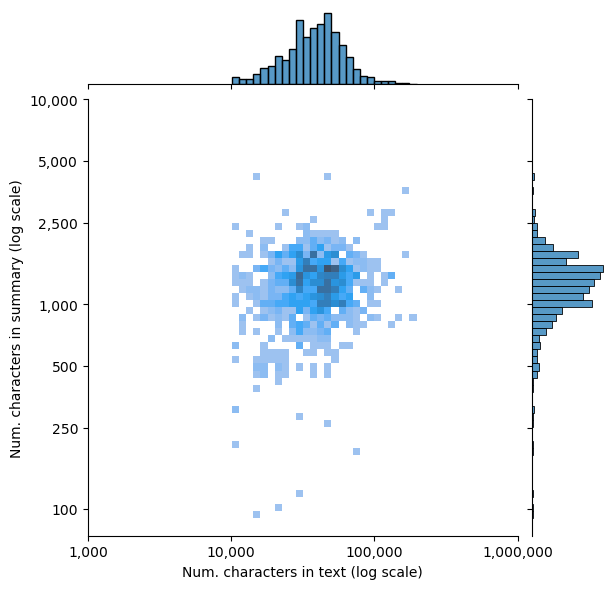

In [172]:
g= sns.jointplot(df, x='text_len_log', y='summary_len_log', kind='hist')
xticks= [3,4,5,6]
yticks = [2,np.log10(250), np.log10(500), 3, np.log10(2_500), np.log10(5_000), 4 ]
g.ax_marg_x.set_xticks(xticks, [f"{10**tick:,.0f}" for tick in xticks])
g.ax_marg_y.set_yticks(yticks, [f"{10**tick:,.0f}" for tick in yticks])
g.set_axis_labels(
    "Num. characters in text (log scale)", "Num. characters in summary (log scale)"
)

In [173]:
df.describe()

,text_len,summary_len,text_len_log,summary_len_log
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,42050.269000,1275.241000,4.574534,3.079240
std,21412.146068,426.262199,0.207977,0.162033
min,10145.000000,90.000000,4.006252,1.954243
25%,28381.500000,1008.500000,4.453035,3.003676
50%,38962.000000,1258.500000,4.590641,3.099853
75%,51263.250000,1501.250000,4.709806,3.176453
max,196911.000000,4359.000000,5.294270,3.639387


In [174]:
train, test = train_test_split(df, test_size=0.3, random_state=42)
print(f'train size: {train.shape}, test size: {test.shape}')

train size: (700, 6), test size: (300, 6)


In [175]:
train , validation = train_test_split(train, test_size=0.30, random_state=0)

In [176]:
print(f"train shape: {train.shape}, validation shape : {validation.shape}, test shape : {test.shape}")

train shape: (490, 6), validation shape : (210, 6), test shape : (300, 6)


In [177]:
def doc_and_summary(doc_row: pd.Series):
    return doc_row['text'], doc_row['summary']


In [178]:
def show_doc_and_sumarry(doc: str , summary: str, max_len_to_print=500) -> str:
    return(
        f'Document ({max_len_to_print:,} of{len(doc):,}characters ):\n'
        f"{fill(doc[:max_len_to_print], replace_whitespace=False)}...\n\n"
        f'Summary ({len(summary):,}characters):\n'
        f'{fill(summary)}'
    )

doc_row = train.loc[533]
doc, summary = doc_and_summary(doc_row)
print(show_doc_and_sumarry(doc, summary))

Document (500 of135,755characters ):
## 1.1 Policy context


Some 25 per cent of Australians live outside
one of the nation's capitals, resulting in a substantial
nonmetropolitan population in absolute terms, but a much smaller
population relative to the total number resident in the largest
metropolitan centres. Policy for rural and regional housing across
Australia is made complex by federation: the Australian Government has
relatively few direct powers with respect to housing, but remains an
important source of financial support...

Summary (1,405characters):
This AHURI research examined housing trends and the processes of
delivering affordable housing supply in rural and regional Australia.
These rural and regional housing markets have faced substantial
challenges for more than three decades, including poor housing
affordability; under-developed supply chains; the shortage of skilled
and unskilled labour force; increasing demand for housing in some
localities, while other centres de

In [179]:
prompt_template = 'Here is a terrific one-sentence summarry of "{doc}": '
prompt= prompt_template.format(doc=doc)

def show_prompt(prompt: str , start_chars: int = 60, end_chars: int =30) -> str:
    return f"Our prompt ({len(prompt):,} characters):\n{prompt[:start_chars]} ... {prompt[-end_chars:]}"

print(show_prompt(prompt))

Our prompt (135,803 characters):
Here is a terrific one-sentence summarry of "## 1.1 Policy c ... e off housing nationwide.

": 


In [180]:
requests.get(LLM_server + '/api/version').json()

{'version': '0.12.2'}

In [181]:
import json

In [182]:
def get_llm_completion(prompt: str, max_tokens :int | None= None, top_k: int | None = None) -> str:
    data = {
        "model": MODEL,
        "prompt": prompt,
        "seed":0,
        "max_tokens": max_tokens,
        "top_k": top_k,

    }
    resp = requests.post(LLM_server + '/v1/generate', json=data)
    return resp.json()['choices'][0]['text']

In [183]:
def get_llm_completion(
    prompt: str, max_tokens: int | None = None, top_k: int | None = None
) -> str:
    """Hit an API endpoint to get an LLM completion"""
    data = {
        "model": MODEL,
        "prompt": prompt,
        "seed": 0,
        "max_tokens": max_tokens,
        "top_k": top_k,
    }
    resp = requests.post(LLM_server + "/v1/completions", json=data)
    return resp.json()["choices"][0]["text"]

In [184]:
completion = get_llm_completion(prompt)
print(prompt_template +"\n\n" + fill(completion, replace_whitespace=False)[:1000])

Here is a terrific one-sentence summarry of "{doc}": 

Okay, here's a breakdown of the key takeaways from the text, organized
into categories to make it easier to digest:

**1. Core Problem &
Context - The Challenges Facing Regional Housing**

* **Long-Term
Economic & Demographic Change:** Australia’s population is shifting,
with growth concentrated in the eastern seaboard and decline in inland
and remote areas.
* **Pandemic Impact:** The pandemic significantly
accelerated some trends, including the shift in demand to suburban and
rural areas.
* **Regional Housing Supply Fragility:**  Existing
housing supply is fragile and lacks sufficient infrastructure and
resources, particularly in rural areas. This is a critical issue.
**2.  Analysis of International Experience (The Nordic Countries)**

*
**Direct Government Intervention:**  The text highlights that
governments aren’t doing enough to proactively address the problem.
This is a major point of concern.
* **Focus on Local Knowledge &
P

In [186]:
def count_tokens(text: str) -> int :
    enc = tiktoken.encoding_for_model('gpt-4o')
    return len(enc.encode(text))

In [189]:
print(f'Our prompt is {count_tokens(prompt):,} tokens. ')

Our prompt is 25,854 tokens. 


In [190]:
print(show_prompt(prompt))

Our prompt (135,803 characters):
Here is a terrific one-sentence summarry of "## 1.1 Policy c ... e off housing nationwide.

": 


In [192]:
shorter_prompt = prompt_template.format(doc=doc[:7_500])
print(f'Our shorter prompt is {count_tokens(shorter_prompt):,} tokens. ')
print(show_prompt(shorter_prompt))

Our shorter prompt is 1,362 tokens. 
Our prompt (7,548 characters):
Here is a terrific one-sentence summarry of "## 1.1 Policy c ... rdable rental housing (Mart": 


In [195]:
completion = get_llm_completion(shorter_prompt)
print(fill(completion, replace_whitespace=False)[:1000])

Okay, here’s a breakdown of the key takeaways from the text, organized
for clarity:

**1. The Housing Crisis in Australia – A Complex
Situation**

*   **Significant Population Gap:** Australia has a large
proportion of residents outside major capital cities, creating a
substantial rural and regional population, but a smaller population
overall.
*   **Federalism’s Impact:**  The Australian government’s
limited direct powers regarding housing across federation creates
challenges for effective regional policies.
*   **Existing Support:**
While the federal government provides financial support, it’s not
specifically targeting regional needs.

**2. Key Existing Programs &
Initiatives**

*   **Regional First Home Buyer Guarantee (RFHBG):**
Housing Australia administers this program to support regional
homebuyers with a 5% deposit. It’s been running for 10,000 places
since 2023 and has significant funding from the HAFF.
*   **Housing
Australia Future Fund (HAFF) & National Housing Accord:** T

In [198]:
!pip install openai
from openai import OpenAI


   ---------------------------------------- 0.0/948.6 kB ? eta -:--:--
   ----------- ---------------------------- 262.1/948.6 kB ? eta -:--:--
   ---------------------------------------- 948.6/948.6 kB 3.4 MB/s eta 0:00:00


In [202]:
llm_client = OpenAI(base_url=LLM_server + "/v1", api_key="my-fake-api-key!")
chat_completion = llm_client.chat.completions.create(
    messages=[
        {"role":"user",
        "content": "what's your name, age , and favorite color?"}
    ],
    model= MODEL,
    seed=0,
)

print(fill(chat_completion.choices[0].message.content, replace_whitespace=False))

I'm a large language model, trained by Google. I don’t have a name in
the traditional sense! I’m still under development. 

As for my
favorite color, that’s a tricky question for me – I don’t experience
colors like humans do! But if I had to pick one, I’d say **teal**. It
represents a blend of calmness and intelligence. 😊

How about you?
What’s your favorite color?


In [203]:
def ask_llm(prompt: str , max_tokens: int = 500):

    chat_completion= llm_client.chat.completions.create(
        messages=[{
            "role":"user",
            "content": prompt,

        }],
        model= MODEL,
        max_tokens = max_tokens,
    )
    return chat_completion.choices[0].message.content , chat_completion

In [204]:
prompt_template= (
    "Can you please write a terrific one-sentence summary of this document :\n\n{doc}"
)

resp, completion = ask_llm(prompt_template.format(doc=doc[:10_000]))

In [205]:
print(f'Prompt tokens :{completion.usage.prompt_tokens:,}\nCompletion tokens :{completion.usage.completion_tokens:,}')

Prompt tokens :1,904
Completion tokens :68


In [206]:
print(fill(resp, replace_whitespace=False))

Here's a one-sentence summary of the document:

**The Australian
government’s efforts to address rural and regional housing challenges,
while focused on supporting local governments and community housing
providers, are hampered by a fragmented approach and a lack of
substantial investment in social housing, leading to a complex
interplay of policy initiatives and regional disparities.**
